首先明确目标:预测商品的销量。商品部门可以合理的补货，减少库存，爆款的预先补货，可以提升用户的体验（不用缺货预售），销量。所以如果可以进行有效销量预测既可以减少成本，又可以增加销售额。
问题分析（提取关键）：
1.公司每周会上新40款左右的新品，卖一周左右后会补第一批货，新品的销量预测很重要，因为一般只会补新品，新品比较容易补到，而且当季的新品卖不完就会堆积库存。   
所以新品上线后的一个季度最重要 120天
2.女装一般是2，8分。20%的款带来了80%的GMV。 
所以畅销款的预测很重要

In [29]:
    import pandas as pd
    import numpy as np

In [30]:
#导入所有商品上架120天的销量数据
df = pd.read_excel('/Users/silin/Downloads/商品120天累加图2.xlsx')


In [31]:
df.describe()#先看看所有数据的分布

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
count,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,...,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000,2390.000000
mean,0.305021,0.671130,1.212971,2.074059,2.692887,3.162343,3.591213,4.187448,4.777406,5.335565,...,102.906276,103.172385,103.728033,103.994561,104.446862,105.992469,106.601255,106.879498,107.129707,108.096234
std,1.530031,2.578326,3.969990,5.655666,7.100740,7.960793,8.327827,9.178387,10.081326,11.032371,...,267.270048,267.844911,268.718894,269.233018,270.377621,281.994771,283.815383,284.694941,285.292405,289.232283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,31.000000,31.000000,31.000000
75%,0.000000,1.000000,1.000000,2.000000,3.000000,3.000000,4.000000,5.000000,5.000000,6.000000,...,78.000000,78.000000,78.000000,79.000000,79.000000,80.000000,80.000000,80.000000,80.000000,80.000000
max,60.000000,90.000000,120.000000,142.000000,193.000000,211.000000,211.000000,244.000000,267.000000,287.000000,...,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4850.000000,4886.000000,4922.000000,4948.000000,4965.000000


In [32]:
end=df[119]
end.describe(percentiles=[0.98,0.9,0.7,0.5])

count    2390.000000
mean      108.096234
std       289.232283
min         1.000000
50%        31.000000
70%        63.000000
90%       234.100000
98%       894.320000
max      4965.000000
Name: 119, dtype: float64

In [33]:
level = df.describe(percentiles=[0.98,0.9,0.7,0.5])
level.T.to_excel('/Users/silin/Downloads/等级图.xlsx')

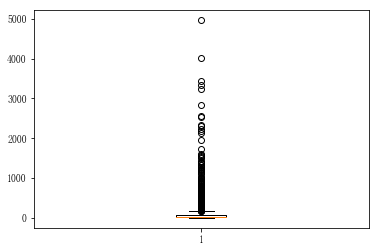

In [34]:
    import matplotlib.pyplot as plt
    from pylab import *
    mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
    boxplot(end)
    plt.show()

从120天的时候的平均值101 75%分位的只为76 说明大部分的gmv是由少部分的畅销款带来的

从须盒图可以看出来女装行业爆款的影响果然符合2，8理论
下面我们来看看畅销款的分布


In [35]:
top_end = end[end>end.describe().loc['75%']]
top_end.describe()

count     597.000000
mean      356.301508
std       501.860755
min        81.000000
25%       110.000000
50%       182.000000
75%       371.000000
max      4965.000000
Name: 119, dtype: float64

In [36]:
top_end.sum()/end.sum()

0.8233481710857364

前25%的商品带来了82%的销量， 并且前25%的商品中大部分销量也来自前25%

{'whiskers': [<matplotlib.lines.Line2D at 0x12160c860>,
 'caps': [<matplotlib.lines.Line2D at 0x116b06390>,
 'boxes': [<matplotlib.lines.Line2D at 0x12160c898>],
 'medians': [<matplotlib.lines.Line2D at 0x120d36eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x120d366d8>],
 'means': []}

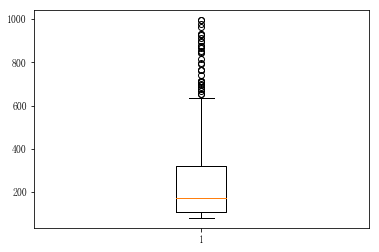

In [37]:
top_end = top_end[top_end<1000]
boxplot(top_end)

这时候有2种思路，第1种就是对数据源在进行赛选，去除异常点或者分类等，继续进行数据清洗。第2种就是选择适合的模型进行训练
从图可以看出，现在异常点还是很多的（超级爆款），一般会再清洗下数据，但是现在还不清楚该怎么清洗，所以先选择几个模型进行训练试试


In [38]:
top_end =end #这里先用全部数据进行训练

## 训练数据切割

In [39]:
#把数据切割为测试集合训练集
all_top = df.loc[top_end.index]
ary = all_top.T.to_dict()
total = int(len(ary.keys()))
test_count = int(total*0.01) #测试集的切割根据数据集的大小，<10k的时候可以2 8  >10k 的时候可以根据大小1 99 之类的
test_flg = int(total/test_count)
x_train = []
y_train = []
x_test=[]
y_test=[]
i=0
for _ in ary.values():
    y = _.get(119)
    for k,v in _.items():
        i+=1
        if k == 119:
            continue
        if i >= test_flg:
            y_test.append(y)
            x_test.append([int(k),int(v)])
            i=0
        else:
            y_train.append(y)
            x_train.append([int(k),int(v)])
len(x_test),len(x_train)
temp =x_test+y_test
temp =np.column_stack((x_test,y_test))
temp = temp[temp[:,0].argsort()]
temp
x_test = temp[:,:2]
y_test = temp[:,2]

x_test

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ...,
       [118,  49],
       [118,   3],
       [118,  22]])

In [40]:
def train(model,name=''):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(len(result)), y_test, 'go-', label='true value')
    plt.plot(np.arange(len(result)), result, 'ro-', label='predict value')
    plt.title('%s score: %f' % (name,score))
    plt.legend()
    plt.show()


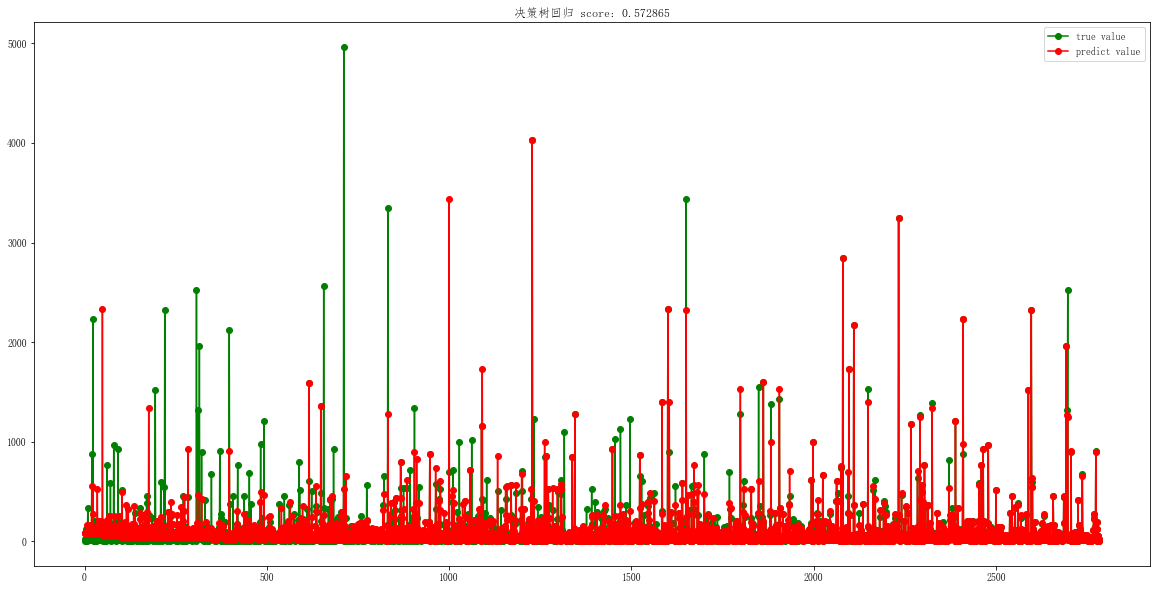

In [41]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
train(model,'决策树回归')


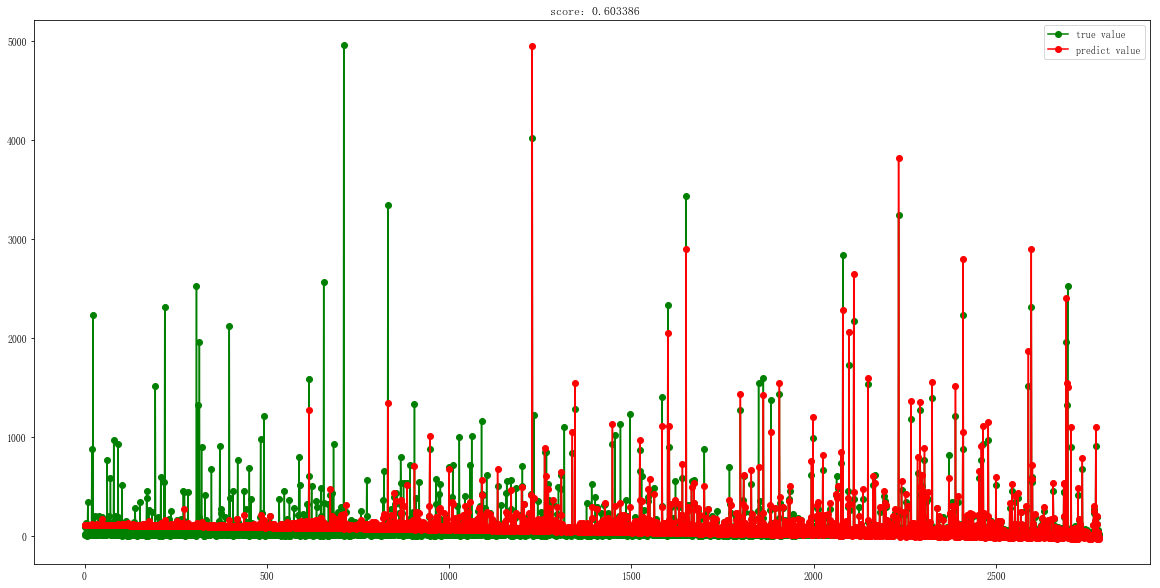

In [42]:
####3.2线性回归####
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
train(model_LinearRegression)

In [43]:
# ####3.3SVM回归####
# from sklearn import svm
# model_SVR = svm.SVR(gamma='scale')
# train(model_SVR)

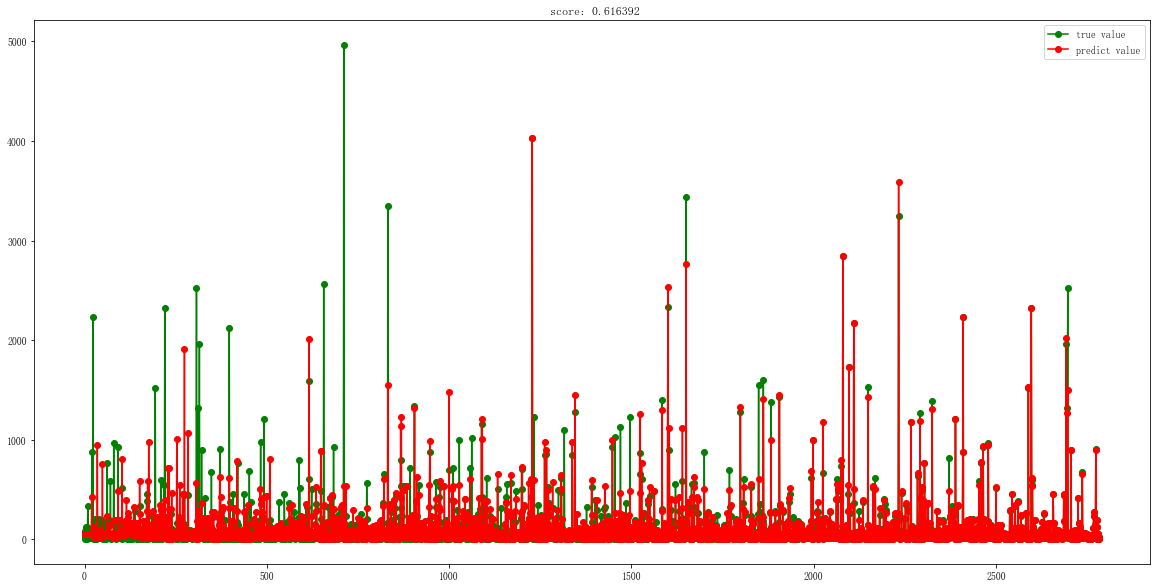

In [44]:
####3.4KNN回归####
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
train(model_KNeighborsRegressor)

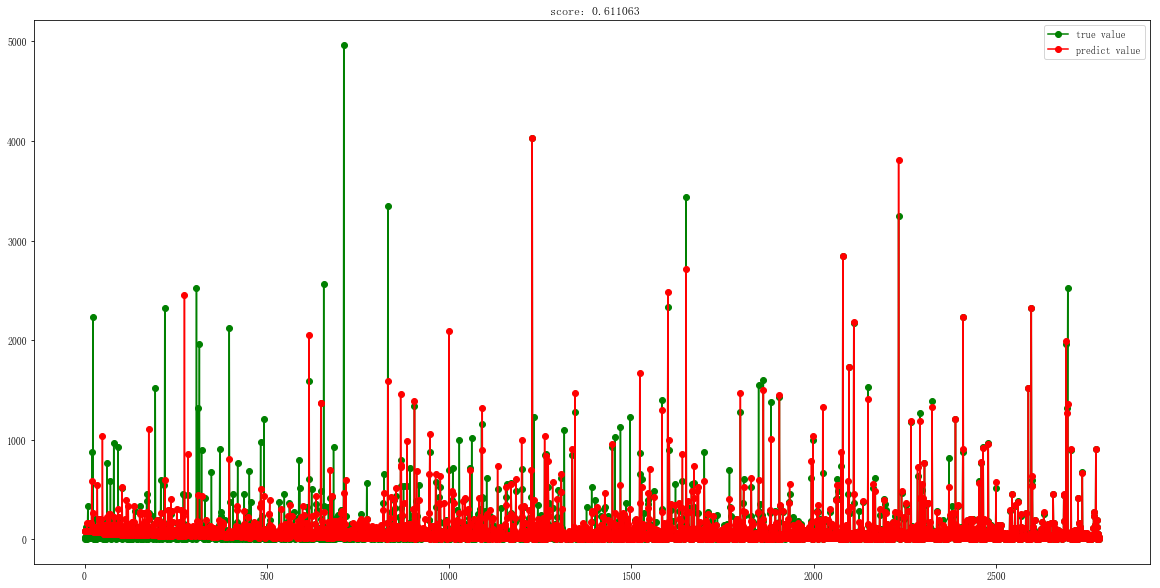

In [45]:

####3.5随机森林回归####
from sklearn import ensemble

model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)
train(model_RandomForestRegressor)# 这里使用20个决策树

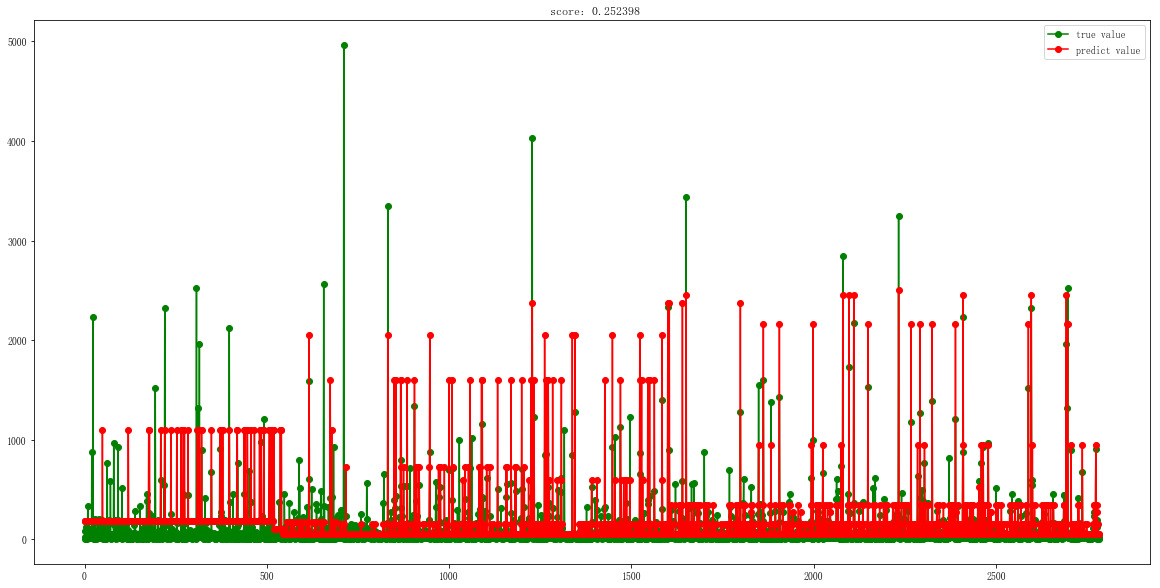

In [46]:

####3.6Adaboost回归####
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(
    n_estimators=50)  # 这里使用50个决策树
train(model_AdaBoostRegressor)

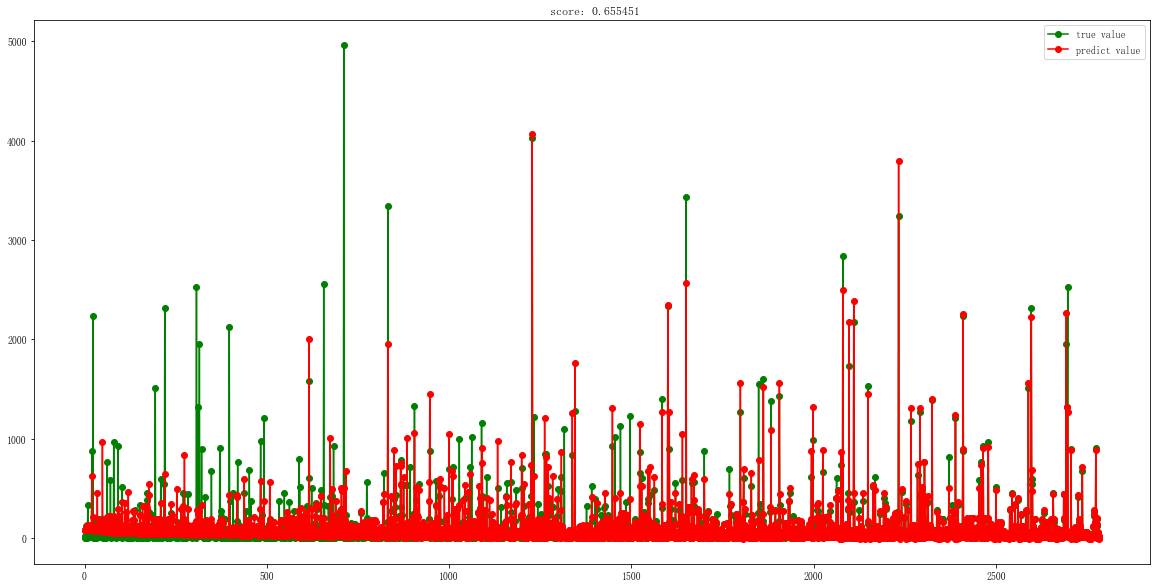

In [47]:
####3.7GBRT回归####
from sklearn import ensemble

model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(
    n_estimators=100)  # 这里使用100个决策树
train(model_GradientBoostingRegressor)

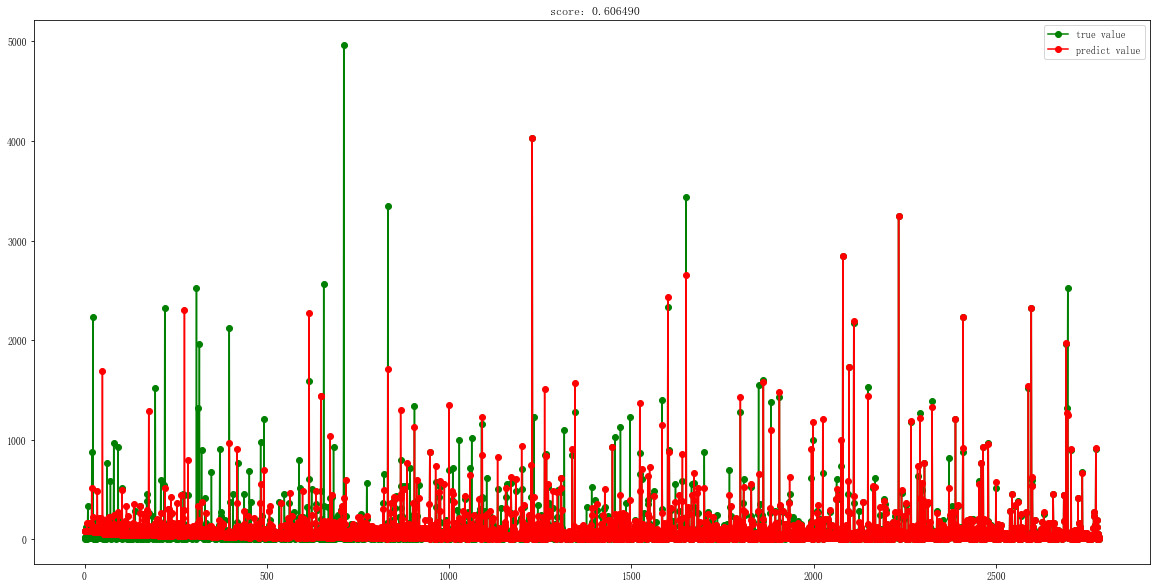

In [48]:
####3.8Bagging回归####
from sklearn.ensemble import BaggingRegressor

model_BaggingRegressor = BaggingRegressor()
train(model_BaggingRegressor)

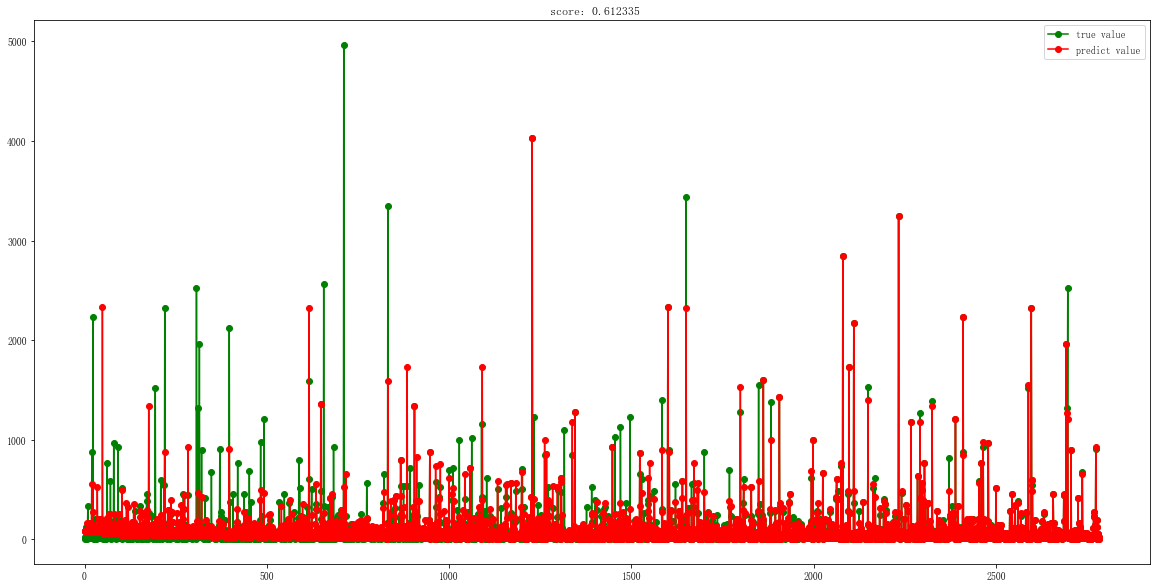

In [49]:
####3.9ExtraTree极端随机树回归####
from sklearn.tree import ExtraTreeRegressor

model_ExtraTreeRegressor = ExtraTreeRegressor()
train(model_ExtraTreeRegressor)

在8个没有进行过调参的基础模型中，模型基础评分中最好的是KNN 和 GBRT回归，分析数据->训练->比较结果->分析数据 的循环了，直到预测结果达到期望。
不过我们在这先走完一遍流程，预测一下上架未满120天的商品的销量。

In [23]:
df = pd.read_excel('/Users/silin/Downloads/未满120天累加图.xlsx')
predict_l = df.T.to_dict()
predict_k = list(predict_l.keys())
predict_x = [[_['days'],_['count']]for _ in predict_l.values()]
predict_x

[[4, 4],
 [53, 67],
 [4, 61],
 [46, 103],
 [88, 193],
 [88, 263],
 [25, 65],
 [4, 36],
 [4, 35],
 [53, 49],
 [88, 103],
 [4, 16],
 [39, 2],
 [74, 260],
 [67, 213],
 [88, 22],
 [95, 71],
 [4, 13],
 [88, 122],
 [67, 23],
 [46, 17],
 [88, 924],
 [88, 15],
 [60, 3],
 [88, 28],
 [4, 122],
 [102, 48],
 [102, 8],
 [102, 29],
 [102, 25],
 [102, 653],
 [102, 12],
 [102, 106],
 [102, 28],
 [109, 12],
 [102, 94],
 [0, 4],
 [102, 9],
 [74, 36],
 [74, 51],
 [67, 32],
 [67, 6],
 [67, 17],
 [95, 377],
 [74, 3],
 [88, 105],
 [67, 9],
 [67, 28],
 [60, 23],
 [67, 1],
 [67, 14],
 [0, 0],
 [109, 71],
 [109, 23],
 [60, 37],
 [60, 23],
 [116, 136],
 [67, 6],
 [53, 0],
 [109, 113],
 [60, 4],
 [67, 2],
 [81, 15],
 [60, 68],
 [109, 198],
 [102, 103],
 [67, 39],
 [74, 14],
 [109, 106],
 [53, 0],
 [67, 8],
 [67, 7],
 [67, 6],
 [67, 4],
 [74, 19],
 [74, 46],
 [95, 56],
 [95, 121],
 [88, 29],
 [95, 110],
 [95, 29],
 [95, 95],
 [74, 30],
 [39, 16],
 [116, 178],
 [74, 3],
 [109, 41],
 [116, 56],
 [116, 40],
 [109, 9

In [24]:
def predict(model,x,name=''):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(len(result)), y_test, 'go-', label='true value')
    plt.plot(np.arange(len(result)), result, 'ro-', label='predict value')
    plt.title('%s score: %f' % (name,score))
    plt.legend()
    plt.show()
    plt.figure(figsize=(20,10))
    predict = model.predict(x)
    plt.plot(np.arange(len(predict)), predict, 'ro-', label='predict value')
    plt.show()
    return predict

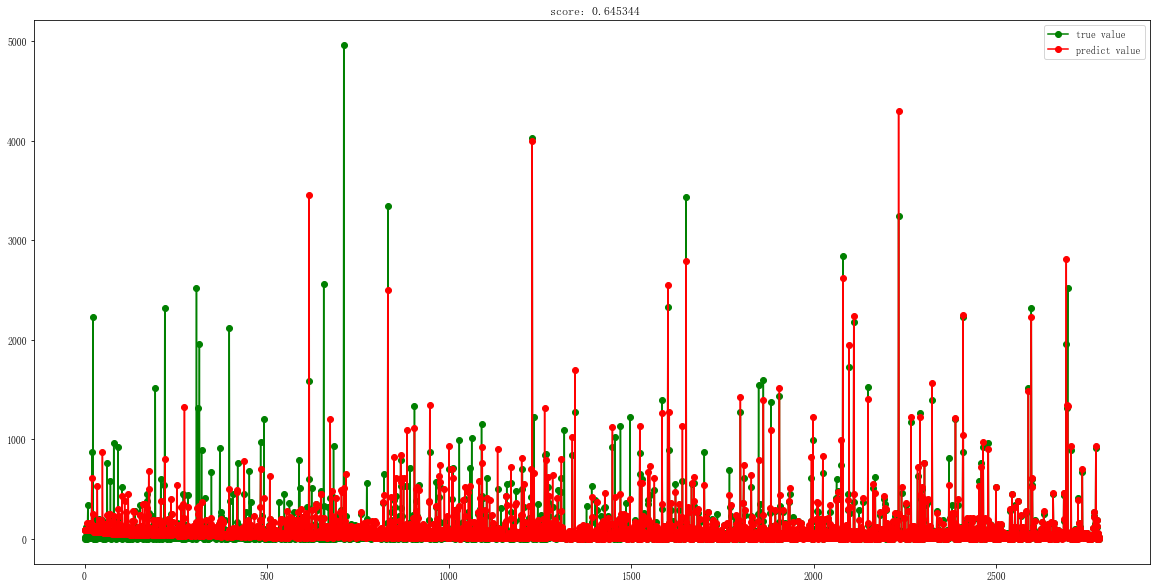

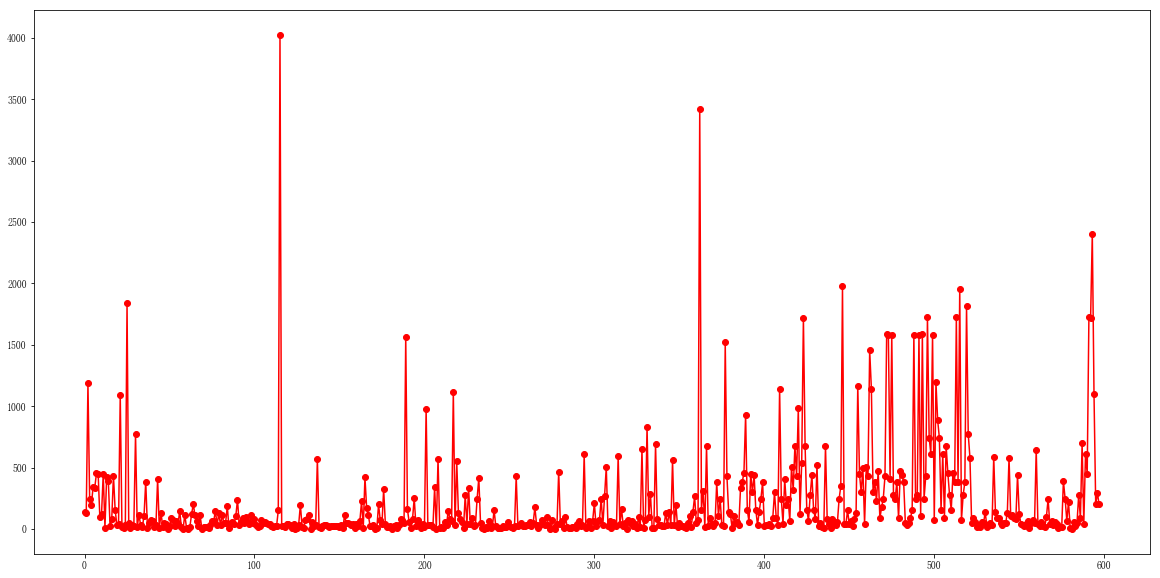

In [27]:
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(
    n_estimators=1000)  # 这里使用100个决策树 
re =  predict(model_GradientBoostingRegressor,predict_x)


In [26]:
a = re.tolist()
for _ in predict_l:
    predict_l[_]['predict'] = int(a.pop(0))
predict_l
df= pd.DataFrame(predict_l).T
df= df.sort_values(by='days')
df.T.to_dict()

{'1907010033': {'count': 16, 'days': 0, 'predict': 735},
 '1908050006': {'count': 1, 'days': 0, 'predict': 137},
 '1908190032': {'count': 4, 'days': 0, 'predict': 341},
 '1908030016': {'count': 5, 'days': 0, 'predict': 352},
 '19070A0030': {'count': 5, 'days': 0, 'predict': 352},
 '1907050031': {'count': 3, 'days': 0, 'predict': 242},
 '1851030025': {'count': 2, 'days': 0, 'predict': 212},
 '1908170033': {'count': 4, 'days': 0, 'predict': 341},
 '1907010039': {'count': 13, 'days': 0, 'predict': 1093},
 '19080A0030': {'count': 5, 'days': 0, 'predict': 352},
 '1907010007': {'count': 10, 'days': 0, 'predict': 574},
 '1907030008': {'count': 1, 'days': 0, 'predict': 137},
 '1908010007': {'count': 3, 'days': 0, 'predict': 242},
 '1907010038': {'count': 10, 'days': 0, 'predict': 574},
 '1849010121': {'count': 0, 'days': 0, 'predict': 82},
 '19080A0021': {'count': 8, 'days': 0, 'predict': 626},
 '1907010027': {'count': 1, 'days': 0, 'predict': 137},
 '1908050027': {'count': 6, 'days': 0, 'pred